In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [112]:
df = pd.read_csv("diamonds.csv")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [113]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [115]:
df_copy = df.copy()

## Data Analysis

In [116]:
# Define the order of clarity grades
clarity_order = {
    'I1': 1,
    'SI2': 2,
    'SI1': 3,
    'VS2': 4,
    'VS1': 5,
    'VVS2': 6,
    'VVS1': 7,
    'IF': 8
}

# Map the clarity column to numerical values
df_copy['clarity'] = df_copy['clarity'].map(clarity_order)

In [117]:
# Descriptive Statistics
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540

In [118]:
print("\nFrequency Counts:")
print(df['cut'].value_counts())
print(df['color'].value_counts())
print(df['clarity'].value_counts())


Frequency Counts:
cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64


## Data Visualization

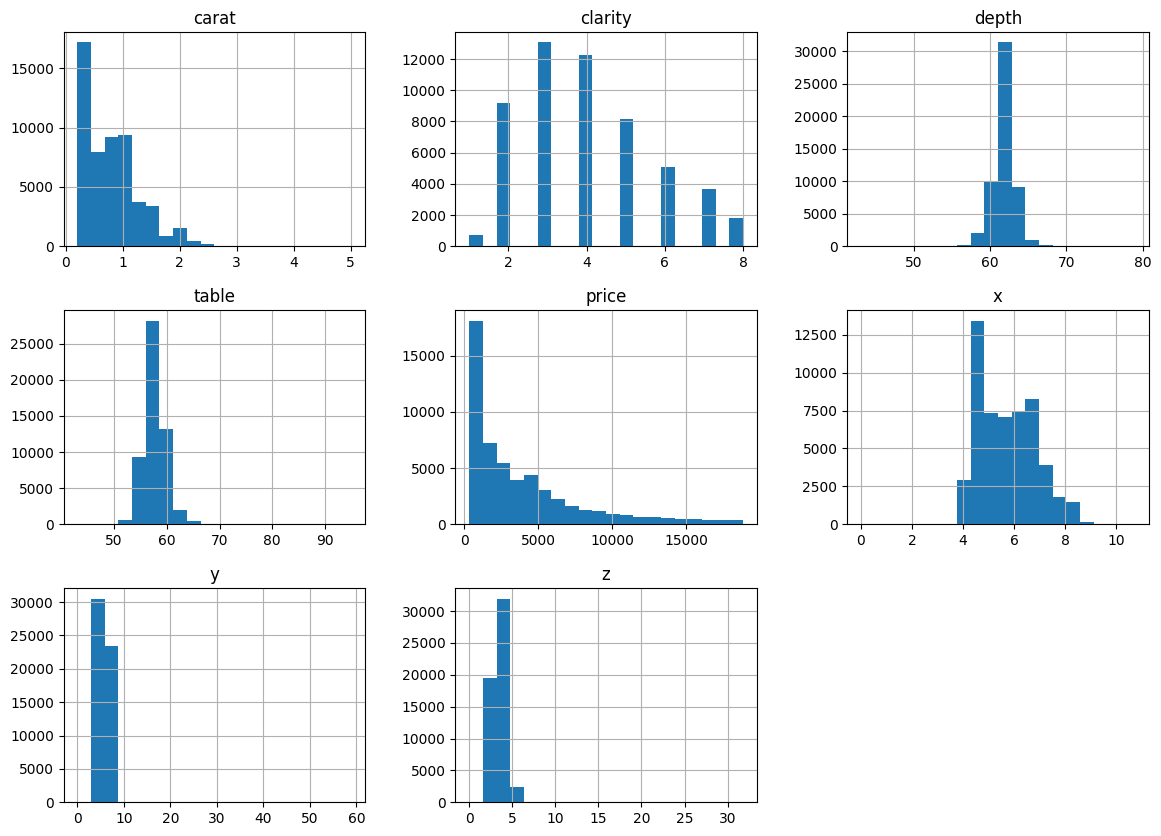

In [119]:
# Histograms
df_copy.hist(bins=20, figsize=(14, 10))
plt.show()

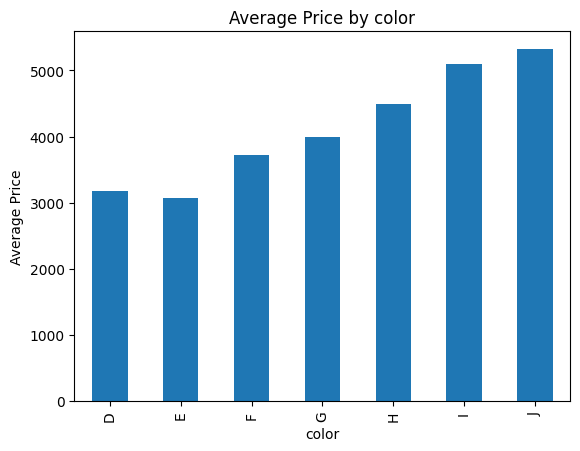

In [120]:
# Bar plot of companies and their prices
df_copy.groupby('color')['price'].mean().plot(kind='bar')
plt.ylabel('Average Price')
plt.title('Average Price by color')
plt.show()

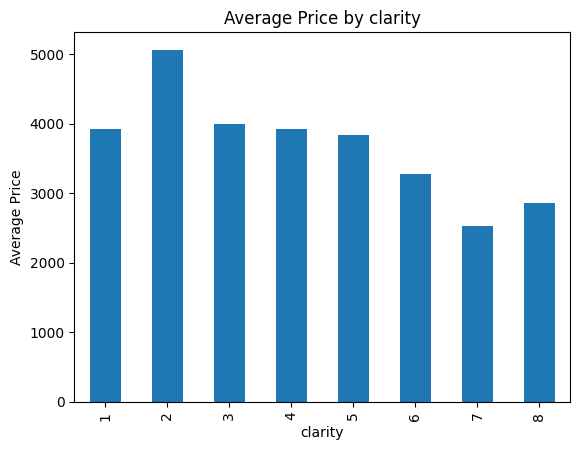

In [121]:
# Bar plot of companies and their prices
df_copy.groupby('clarity')['price'].mean().plot(kind='bar')
plt.ylabel('Average Price')
plt.title('Average Price by clarity')
plt.show()

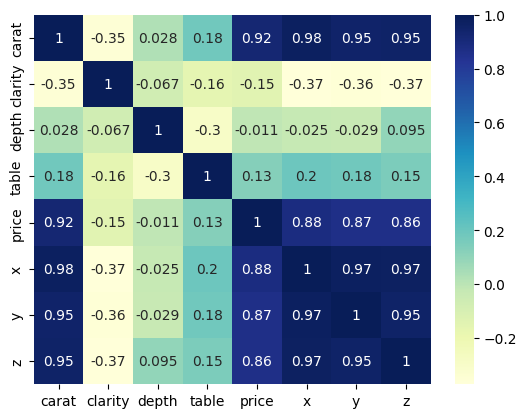

In [122]:
corr = df_copy.select_dtypes(include=np.number).corr()
dataplot = sb.heatmap(corr,  annot=True, cmap="YlGnBu") # cmap="YlGnBu",
plt.show()

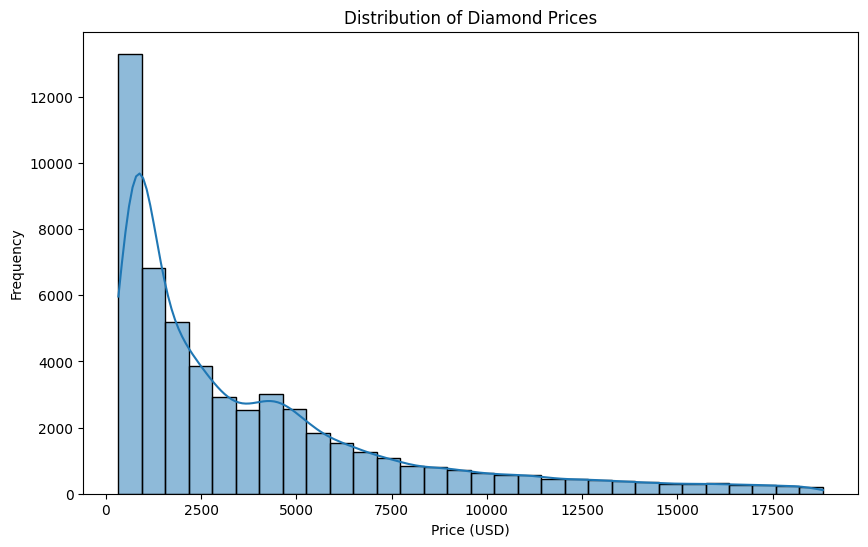

In [123]:
plt.figure(figsize=(10, 6))
sb.histplot(df_copy['price'], bins=30, kde=True)
plt.title('Distribution of Diamond Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

In [124]:
# Group by cut
cut_price_stats = df_copy.groupby('cut')['price'].describe()
print("Price Statistics by Cut:")
print(cut_price_stats)


Price Statistics by Cut:
             count         mean          std    min      25%     50%      75%  \
cut                                                                             
Fair        1610.0  4358.757764  3560.386612  337.0  2050.25  3282.0  5205.50   
Good        4906.0  3928.864452  3681.589584  327.0  1145.00  3050.5  5028.00   
Ideal      21551.0  3457.541970  3808.401172  326.0   878.00  1810.0  4678.50   
Premium    13791.0  4584.257704  4349.204961  326.0  1046.00  3185.0  6296.00   
Very Good  12082.0  3981.759891  3935.862161  336.0   912.00  2648.0  5372.75   

               max  
cut                 
Fair       18574.0  
Good       18788.0  
Ideal      18806.0  
Premium    18823.0  
Very Good  18818.0  


In [125]:
# Group by color
color_price_stats = df_copy.groupby('color')['price'].describe()
print("\nPrice Statistics by Color:")
print(color_price_stats)


Price Statistics by Color:
         count         mean          std    min     25%     50%      75%  \
color                                                                      
D       6775.0  3169.954096  3356.590935  357.0   911.0  1838.0  4213.50   
E       9797.0  3076.752475  3344.158685  326.0   882.0  1739.0  4003.00   
F       9542.0  3724.886397  3784.992007  342.0   982.0  2343.5  4868.25   
G      11292.0  3999.135671  4051.102846  354.0   931.0  2242.0  6048.00   
H       8304.0  4486.669196  4215.944171  337.0   984.0  3460.0  5980.25   
I       5422.0  5091.874954  4722.387604  334.0  1120.5  3730.0  7201.75   
J       2808.0  5323.818020  4438.187251  335.0  1860.5  4234.0  7695.00   

           max  
color           
D      18693.0  
E      18731.0  
F      18791.0  
G      18818.0  
H      18803.0  
I      18823.0  
J      18710.0  


In [126]:
# Group by clarity
clarity_price_stats = df_copy.groupby('clarity')['price'].describe()
print("\nPrice Statistics by Clarity:")
print(clarity_price_stats)


Price Statistics by Clarity:
           count         mean          std    min      25%     50%      75%  \
clarity                                                                       
1          741.0  3924.168691  2806.778270  345.0  2080.00  3344.0  5161.00   
2         9194.0  5063.028606  4260.458578  326.0  2264.00  4072.0  5777.25   
3        13065.0  3996.001148  3799.483853  326.0  1089.00  2822.0  5250.00   
4        12258.0  3924.989395  4042.302816  334.0   900.00  2054.0  6023.75   
5         8171.0  3839.455391  4011.747958  327.0   876.00  2005.0  6023.00   
6         5066.0  3283.737071  3821.647537  336.0   794.25  1311.0  3638.25   
7         3655.0  2523.114637  3334.838888  336.0   816.00  1093.0  2379.00   
8         1790.0  2864.839106  3920.248499  369.0   895.00  1080.0  2388.50   

             max  
clarity           
1        18531.0  
2        18804.0  
3        18818.0  
4        18823.0  
5        18795.0  
6        18768.0  
7        18777.0  
8       

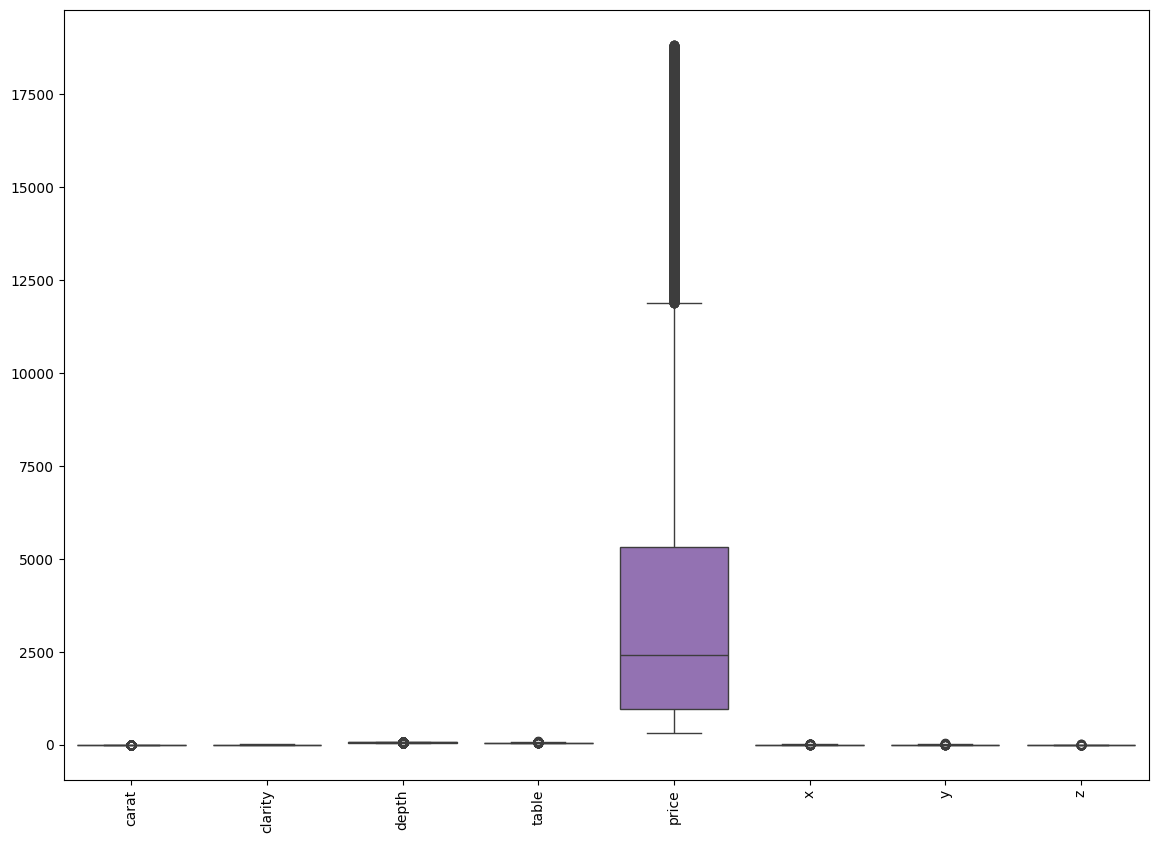

In [127]:
# Box Plots
plt.figure(figsize=(14, 10))
sb.boxplot(data=df_copy)
plt.xticks(rotation=90)
plt.show()

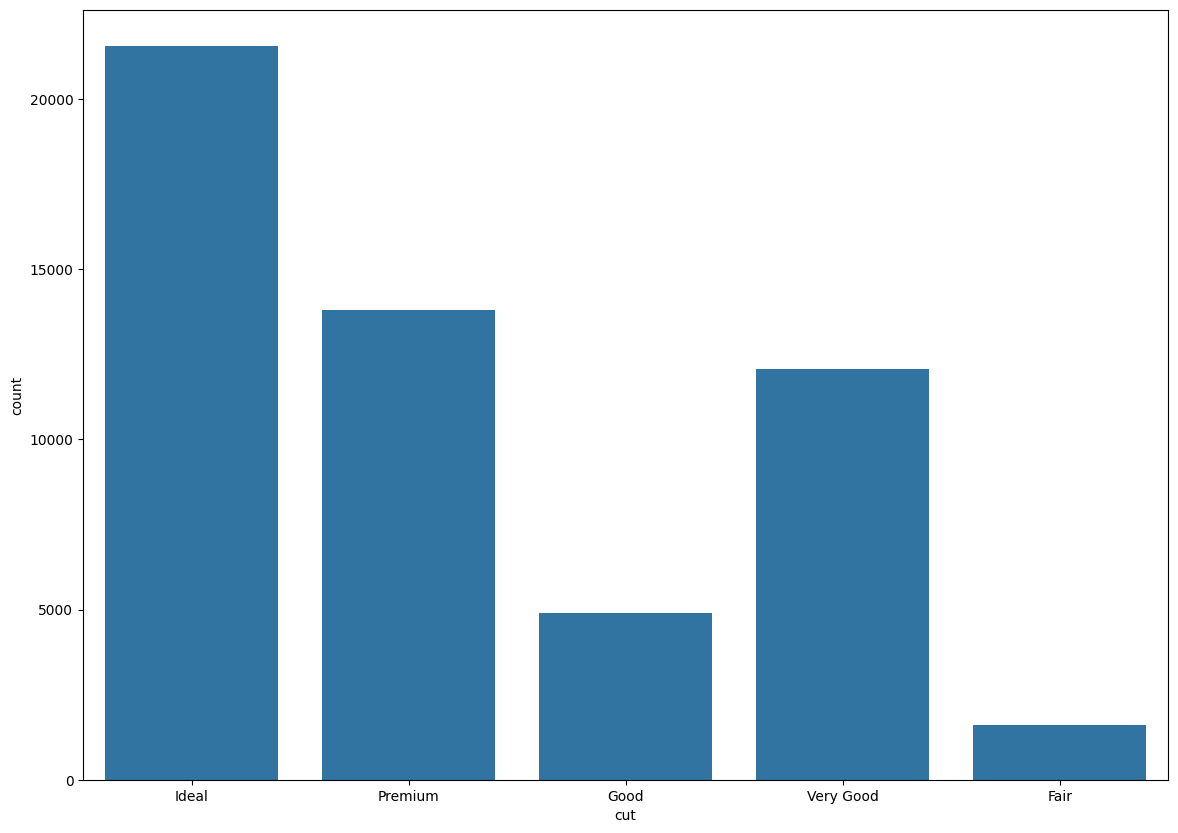

In [128]:
# Bar Charts for Categorical Variables
plt.figure(figsize=(14, 10))
sb.countplot(x='cut', data=df_copy)
plt.show()


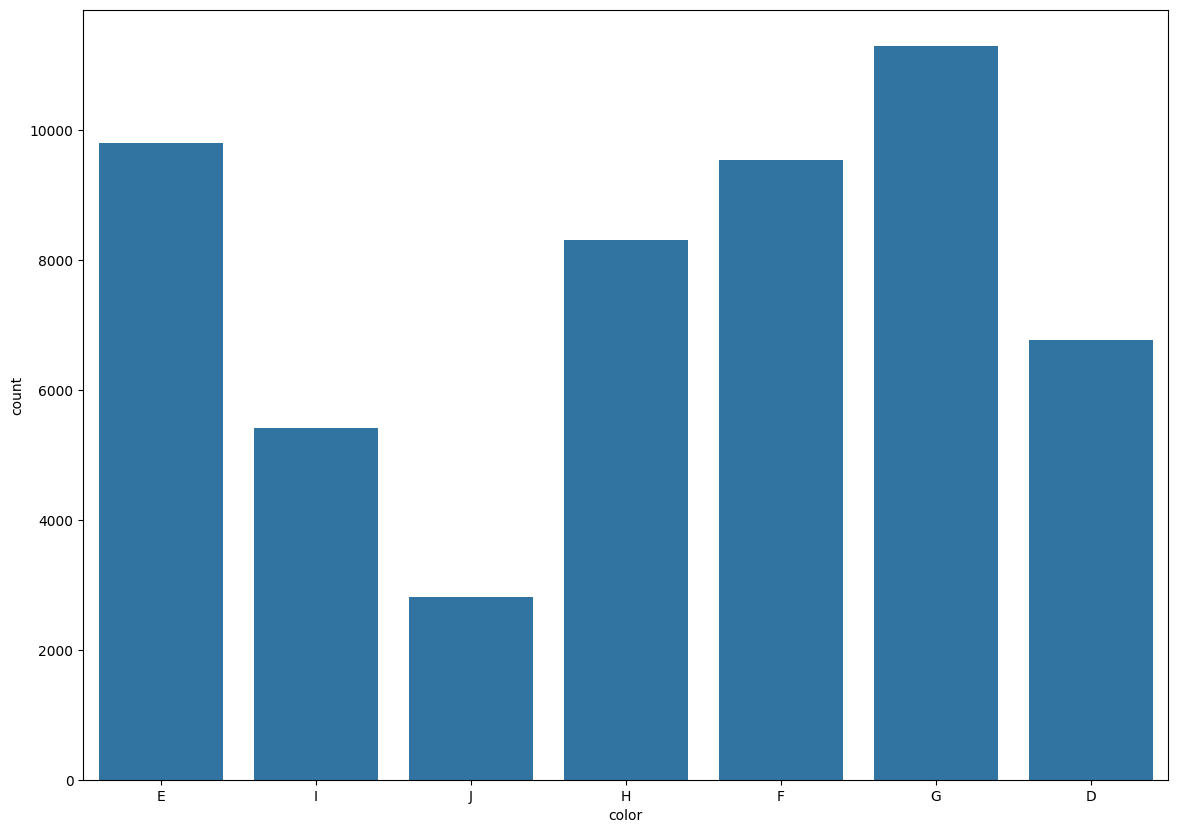

In [129]:
plt.figure(figsize=(14, 10))
sb.countplot(x='color', data=df_copy)
plt.show()

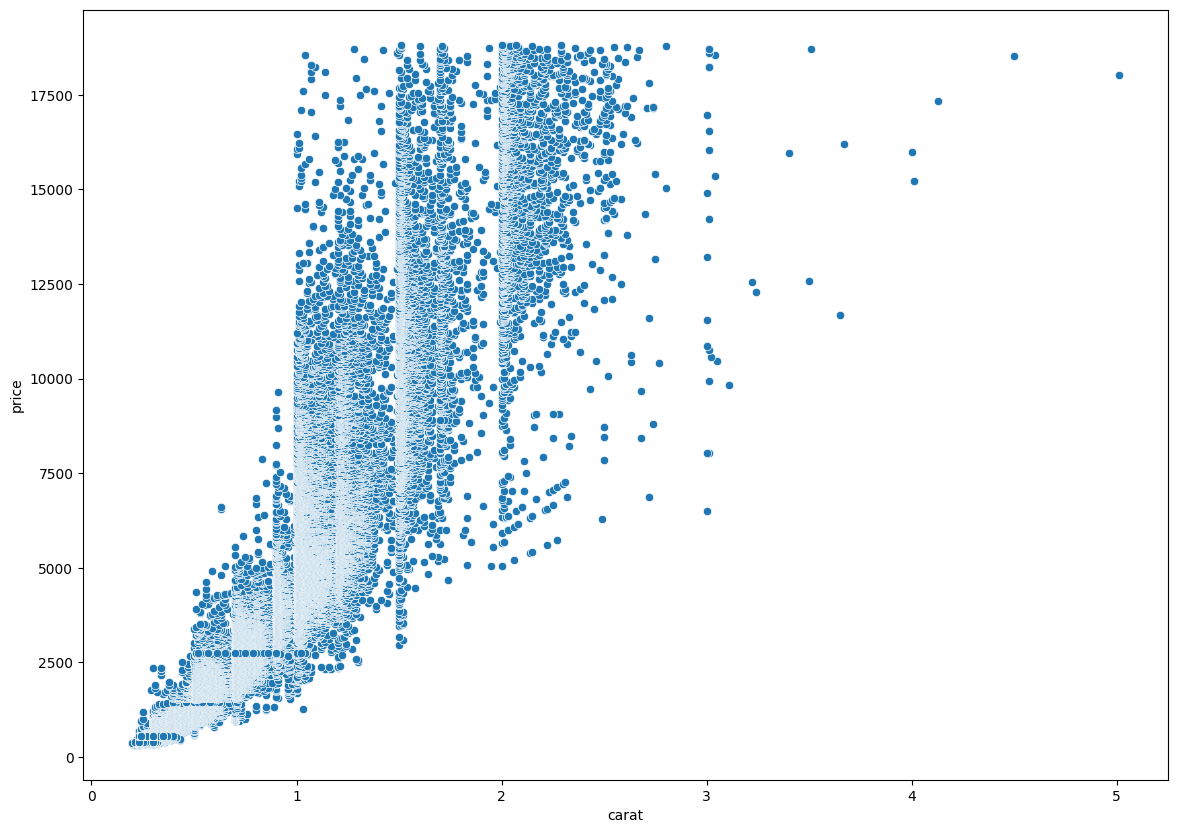

In [130]:
# Scatter Plots
plt.figure(figsize=(14, 10))
sb.scatterplot(x='carat', y='price', data=df_copy)
plt.show()

In [131]:
df_copy

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,3,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,3,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,3,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,2,61.0,58.0,2757,6.15,6.12,3.74


## -

In [132]:
df_train, df_test = train_test_split(df, test_size=0.5, random_state=42)
df_train

,carat,cut,color,clarity,depth,table,price,x,y,z
33196,0.30,Very Good,G,VVS2,59.7,63.0,819,4.37,4.34,2.60
52171,0.70,Ideal,H,VS2,62.6,54.0,2475,5.70,5.73,3.58
52637,0.24,Very Good,F,VVS2,62.8,58.0,552,3.95,3.98,2.49
29045,0.40,Very Good,E,SI1,61.4,58.0,687,4.77,4.81,2.94
19695,0.40,Ideal,I,SI1,62.3,55.0,624,4.72,4.75,2.95
...,...,...,...,...,...,...,...,...,...,...
11284,1.05,Very Good,I,VS2,62.4,59.0,4975,6.48,6.51,4.05
44732,0.47,Ideal,D,VS1,61.0,55.0,1617,5.03,5.01,3.06
38158,0.33,Very Good,F,IF,60.3,58.0,1014,4.49,4.46,2.70
860,0.90,Premium,J,SI1,62.8,59.0,2871,6.13,6.03,3.82


In [133]:
df_train.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [134]:
df_test.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [135]:
# Define the order of clarity grades
clarity_order = {
    'I1': 1,
    'SI2': 2,
    'SI1': 3,
    'VS2': 4,
    'VS1': 5,
    'VVS2': 6,
    'VVS1': 7,
    'IF': 8
}

In [136]:

# Map the clarity column to numerical values
df_train['clarity'] = df_train['clarity'].map(clarity_order)
df_train

,carat,cut,color,clarity,depth,table,price,x,y,z
33196,0.30,Very Good,G,6,59.7,63.0,819,4.37,4.34,2.60
52171,0.70,Ideal,H,4,62.6,54.0,2475,5.70,5.73,3.58
52637,0.24,Very Good,F,6,62.8,58.0,552,3.95,3.98,2.49
29045,0.40,Very Good,E,3,61.4,58.0,687,4.77,4.81,2.94
19695,0.40,Ideal,I,3,62.3,55.0,624,4.72,4.75,2.95
...,...,...,...,...,...,...,...,...,...,...
11284,1.05,Very Good,I,4,62.4,59.0,4975,6.48,6.51,4.05
44732,0.47,Ideal,D,5,61.0,55.0,1617,5.03,5.01,3.06
38158,0.33,Very Good,F,8,60.3,58.0,1014,4.49,4.46,2.70
860,0.90,Premium,J,3,62.8,59.0,2871,6.13,6.03,3.82


In [137]:
# Map the clarity column to numerical values
df_test['clarity'] = df_test['clarity'].map(clarity_order)
df_test

,carat,cut,color,clarity,depth,table,price,x,y,z
1388,0.24,Ideal,G,7,62.1,56.0,559,3.97,4.00,2.47
50052,0.58,Very Good,F,6,60.0,57.0,2201,5.44,5.42,3.26
41645,0.40,Ideal,E,6,62.1,55.0,1238,4.76,4.74,2.95
42377,0.43,Premium,E,6,60.8,57.0,1304,4.92,4.89,2.98
17244,1.55,Ideal,E,2,62.3,55.0,6901,7.44,7.37,4.61
...,...,...,...,...,...,...,...,...,...,...
50319,0.70,Ideal,I,4,62.0,54.1,2240,5.70,5.73,3.55
5431,1.01,Good,F,2,63.0,60.0,3827,6.28,6.35,3.98
33034,0.32,Ideal,G,7,61.2,55.0,814,4.41,4.44,2.71
3319,0.71,Ideal,D,4,62.4,56.0,3372,5.74,5.70,3.57


In [138]:
df_train.color.unique()

array(['G', 'H', 'F', 'E', 'I', 'J', 'D'], dtype=object)

In [139]:
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']

In [140]:
# Custom function to map categorical values to numerical values
def ordinal_encode(df, column, order):
    order_dict = {key: value for value, key in enumerate(order)}
    df[column] = df[column].map(order_dict)
    return df

In [141]:
df_train = ordinal_encode(df_train, 'color', color_order)
df_test = ordinal_encode(df_test, 'color', color_order)

In [142]:
df_train

,carat,cut,color,clarity,depth,table,price,x,y,z
33196,0.30,Very Good,3,6,59.7,63.0,819,4.37,4.34,2.60
52171,0.70,Ideal,2,4,62.6,54.0,2475,5.70,5.73,3.58
52637,0.24,Very Good,4,6,62.8,58.0,552,3.95,3.98,2.49
29045,0.40,Very Good,5,3,61.4,58.0,687,4.77,4.81,2.94
19695,0.40,Ideal,1,3,62.3,55.0,624,4.72,4.75,2.95
...,...,...,...,...,...,...,...,...,...,...
11284,1.05,Very Good,1,4,62.4,59.0,4975,6.48,6.51,4.05
44732,0.47,Ideal,6,5,61.0,55.0,1617,5.03,5.01,3.06
38158,0.33,Very Good,4,8,60.3,58.0,1014,4.49,4.46,2.70
860,0.90,Premium,0,3,62.8,59.0,2871,6.13,6.03,3.82


In [143]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26970 entries, 33196 to 15795
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26970 non-null  float64
 1   cut      26970 non-null  object 
 2   color    26970 non-null  int64  
 3   clarity  26970 non-null  int64  
 4   depth    26970 non-null  float64
 5   table    26970 non-null  float64
 6   price    26970 non-null  int64  
 7   x        26970 non-null  float64
 8   y        26970 non-null  float64
 9   z        26970 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 2.3+ MB


In [144]:
df_train.color.unique()

array([3, 2, 4, 5, 1, 0, 6], dtype=int64)

In [145]:
df_train.cut.unique()

array(['Very Good', 'Ideal', 'Good', 'Premium', 'Fair'], dtype=object)

In [146]:
train_categorical = df_train.select_dtypes(exclude = np.number).columns
train_categorical

classes = dict()
le = LabelEncoder()
for col in train_categorical:
    df_train[col]= le.fit_transform(df_train[col])
    classes[col] = le.classes_

In [147]:
test_categorical = df_test.select_dtypes(exclude = np.number).columns
test_categorical

classes = dict()
le = LabelEncoder()
for col in test_categorical:
    df_test[col]= le.fit_transform(df_test[col])
    classes[col] = le.classes_

## Linear Regression

In [148]:
x_train, y_train = df_train.drop(columns= 'price').values, df_train['price'].values

In [149]:
x_test, y_test = df_test.drop(columns= 'price').values, df_test['price'].values

In [150]:
reg = LinearRegression() # ols
reg.fit(x_train, y_train)

LinearRegression()

In [151]:
y_pred = reg.predict(x_test)

In [152]:
y_pred[:10]

array([  817.87706931,  3362.92357662,  2073.95243229,  2344.99821535,
       10070.5499919 ,  4962.26970318,  2169.94414028,  2262.64428039,
        2765.17959262,  5869.81414066])

In [153]:
y_test[:10]

array([ 559, 2201, 1238, 1304, 6901, 3011, 1765, 1679, 2102, 4789],
      dtype=int64)

In [154]:
r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)

(0.9064516861572737, 1478433.5818358012, 810.6894527084609)